[The questions we have](#questions)  
[Checking the data](#checking-the-data)  
[Inspecting the data](#inspecting-the-data)  
[Cleaning the data](#cleaning-the-data)  
[Classification](#classification)  
[Conclusions](#conclusions)  
[Sources](#sources)  

In [67]:
from IPython.display import Image
Image(url="https://i.ytimg.com/vi/lwfIYwl-lT8/maxresdefault.jpg")

## The questions we have

What questions would you have if you were a journalist a you just got the date about the passengers on the titanic?

- Who were the people on board?
- Who survived?
- Who did not survive and why?
- What are the survival rates for men, woman and children?
- Is our assumption that more rich people survived correct or not?
- And ofcourse: can we predict who survived?

<a id='checking-the-data'></a>

## Checking the data

To get a feeling about what's in the data let's just have a look at it. And for our info and as a reference I'll also put the description of each field in here. (Copy from the descriptions from Kaggle).

#### VARIABLE DESCRIPTIONS: 
|Name|Description|
|--|-------------------------------|
|survival     |   Survival (0 = No; 1 = Yes)  |
|pclass       |  Passenger Class  (1 = 1st; 2 = 2nd; 3 = 3rd)  |
|name         |   Name  |
|sex          |  Sex  |
|age          |   Age  |
|sibsp        |   Number of Siblings/Spouses Aboard  |
|parch        |   Number of Parents/Children Aboard  |
|ticket       |   Ticket Number  |
|fare         |   Passenger Fare  |
|cabin        |   Cabin  |
|embarked     |   Port of Embarkation  (C = Cherbourg; Q = Queenstown; S = Southampton)  |

SPECIAL NOTES:  
Pclass is a proxy for socio-economic status (SES)  
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower  

Age is in Years; Fractional if Age less than One (1)  
 If the Age is Estimated, it is in the form xx.5  

With respect to the family relation variables (i.e. sibsp and parch)  
some relations were ignored.  The following are the definitions used  
for sibsp and parch.  

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)  
Parent:   Mother or Father of Passenger Aboard Titanic  
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic  

Other family relatives excluded from this study include cousins,  
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled  
only with a nanny, therefore parch=0 for them.  As well, some  
travelled with very close friends or neighbors in a village, however,  
the definitions do not support such relations.  

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
import seaborn as sns

In [29]:
#load and display the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='inspecting-the-data'></a>

## Inspecting the data

Now let's inspect and visualize the data to verify some claims. The following is stated on wikipedia:

"The officers did not know how many they could safely put aboard the lifeboats and launched many of them barely half-full.[140] Third-class passengers were largely left to fend for themselves, causing many of them to become trapped below decks as the ship filled with water.[141] The "women and children first" protocol was generally followed when loading the lifeboats,[141] and most of the male passengers and crew were left aboard."

If we have a look the differences in survival rates between classes. You can clearly see that first class passengers have more survivors than deceased while third class passenger have way more non-survivors than survivors. For firstclass passengers 62.96% survived while only 24.24% of the third class passengers survived. So indeed the data shows what is stated. 


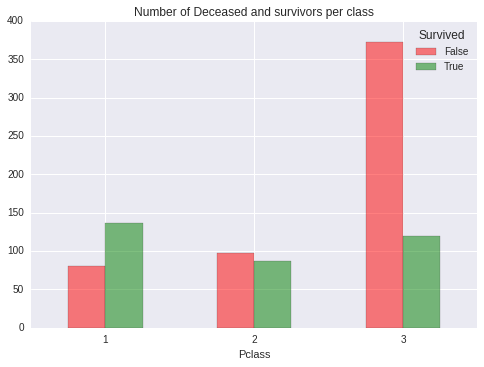

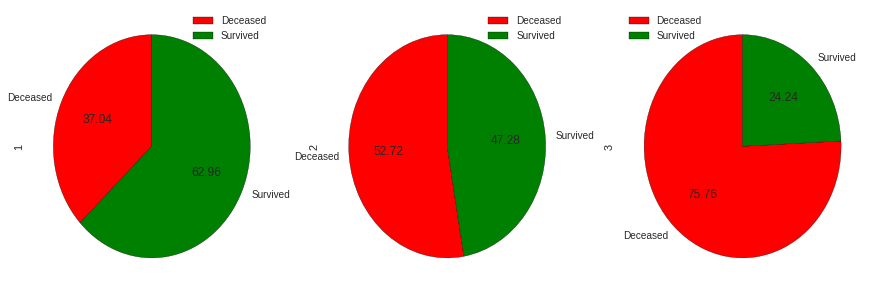

In [8]:
survived_class = pd.crosstab(train.Pclass, train.Survived.astype(bool))
survived_class.plot(kind='bar', rot=0, color=['r','g'], alpha=0.5, title="Number of Deceased and survivors per class");
transposed_survived_class = survived_class.transpose()
transposed_survived_class.plot(labels=['Deceased', 'Survived'], colors=['r', 'g'], kind='pie', subplots='True', rot=1, autopct='%.2f', startangle=90, figsize=[15,5]);

In the visualisations below we can see the differences between male and female passengers. We clearly see that more female passengers survived in comparison to male passengers.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d2134b668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7d212cee80>], dtype=object)

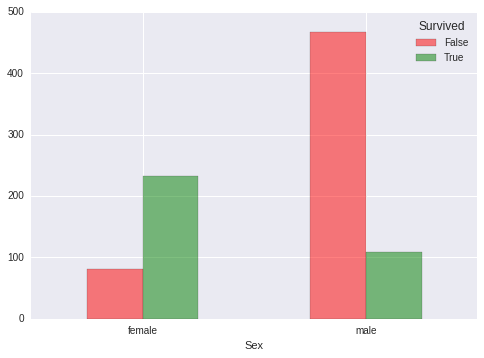

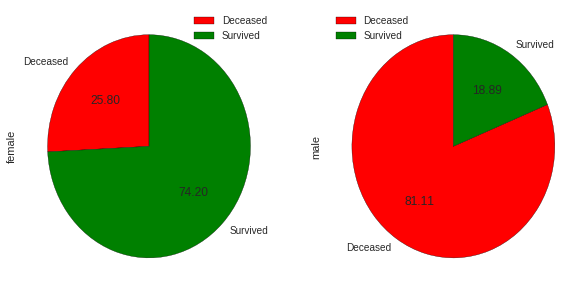

In [9]:
survived_sex = pd.crosstab(train.Sex, train.Survived.astype(bool));
survived_sex.plot(kind='bar', rot=0, color=['r','g'], alpha=0.5)
transposed_survived_sex = survived_sex.transpose()
transposed_survived_sex.plot(kind='pie', subplots=True, labels=['Deceased', 'Survived'], colors=['r','g'], startangle=90, autopct='%.2f', figsize=[10,5])

Let's add an extra column to make a difference between child, woman and man

In [11]:
def child_woman_or_man(passenger):
    age, sex = passenger
    if age < 18:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]
    
#add an extra column to the dataframe
train["who"] = train[["Age", "Sex"]].apply(child_woman_or_man, axis=1)

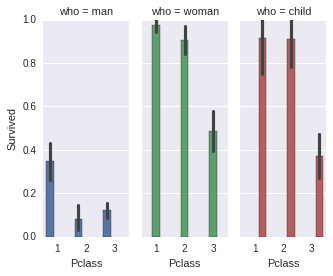

In [12]:
# Wanted to use the pointplot but I ran into the following bug in seaborn: https://github.com/mwaskom/seaborn/issues/709
# TODO Should be fixed with higher version of matplotlib, need to test this.
fg = sns.factorplot("Pclass", "Survived", data=train, hue="who", col="who", aspect=.4, kind='bar')
fg.set(ylim=(0, 1))
fg.despine(left=True)

<a id='cleaning-the-data'></a>

## Cleaning and preparing the data

The most interesting part is trying to predict whether somebody died or survived based on the data we have. In this case this a binary classification. 


By looking at the counts above we can see that 177 values are missing for the Age variable. 

There are different ways of handling missing data, see [ref1](#missing) Next I will simply use the imputation of mean values for age. Although I have a feeling that this might not be the best way of imputing data for the Age variable. <add reason> 



For the non numerical values we will impute the missing values with the most frequent value. <needs more explanation>

Converting of non-numerical data to numerical values(LabelEncoder)



In [14]:
from sklearn.preprocessing import Imputer, LabelEncoder, Normalizer

mu_age    = train['Fare'].mean()

#Data imputation with mean value
train['Age'].fillna(inplace=True, value=mu_age)

# nominal strings -> integers
le = LabelEncoder()
for column in ['Sex', 'Embarked', 'Cabin']:
    
    #Data imputation with most frequent value
    most_freq = train[column].value_counts().idxmax()
    train[column].fillna(inplace=True, value=most_freq)
    
    # Transform all string literals to numerical labels
    le.fit(train[column])
    train[column] = le.transform(train[column])

# As outlined in the feature selection process we will exclude features that we think have no predictive value.
x_cols = [col for col in train.columns if col not in ['Survived', 'Name', 'Ticket', 'PassengerId', 'who']]
X = train[x_cols]
y = train['Survived']

Side note(further investigation needed): Although I'm filling the Cabin field with the most common value I think this might be wrong because as we can see in the table below that there might be a correlation between the class and the Cabin. And imputing the most common Cabin value will destroy this correlation. More intelligent imputing mechanisms are required.

In [34]:
class1 = train[train["Pclass"] == 1]["Cabin"].notnull().sum()
class2 = train[train["Pclass"] == 2]["Cabin"].notnull().sum()
class3 = train[train["Pclass"] == 3]["Cabin"].notnull().sum()
nan_class1 = train[train["Pclass"] == 1]["Cabin"].isnull().sum()
nan_class2 = train[train["Pclass"] == 2]["Cabin"].isnull().sum()
nan_class3 = train[train["Pclass"] == 3]["Cabin"].isnull().sum()
missing_cabin = pd.DataFrame({"Cabin known" : pd.Series([class1, class2, class3], index=["Pclass1", "Pclass2", "Pclass3"]), 
                              "Cabin NaN" : pd.Series([nan_class1, nan_class2, nan_class3], index=["Pclass1", "Pclass2", "Pclass3"])})
missing_cabin

,Cabin NaN,Cabin known
Pclass1,40,176
Pclass2,168,16
Pclass3,479,12


<a id='classification'></a>

## Classification

Predicting if somebody survived or died based on the data we have.

We will train a decisiontree classifier and check what the model looks like by visualizing the decision tree. A decisiontree is in fact a game of yes/no questions. Only the computer will try to ask the best possible questions. For details see [ref2](#dctclass).

In [44]:
from sklearn import tree
import os
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

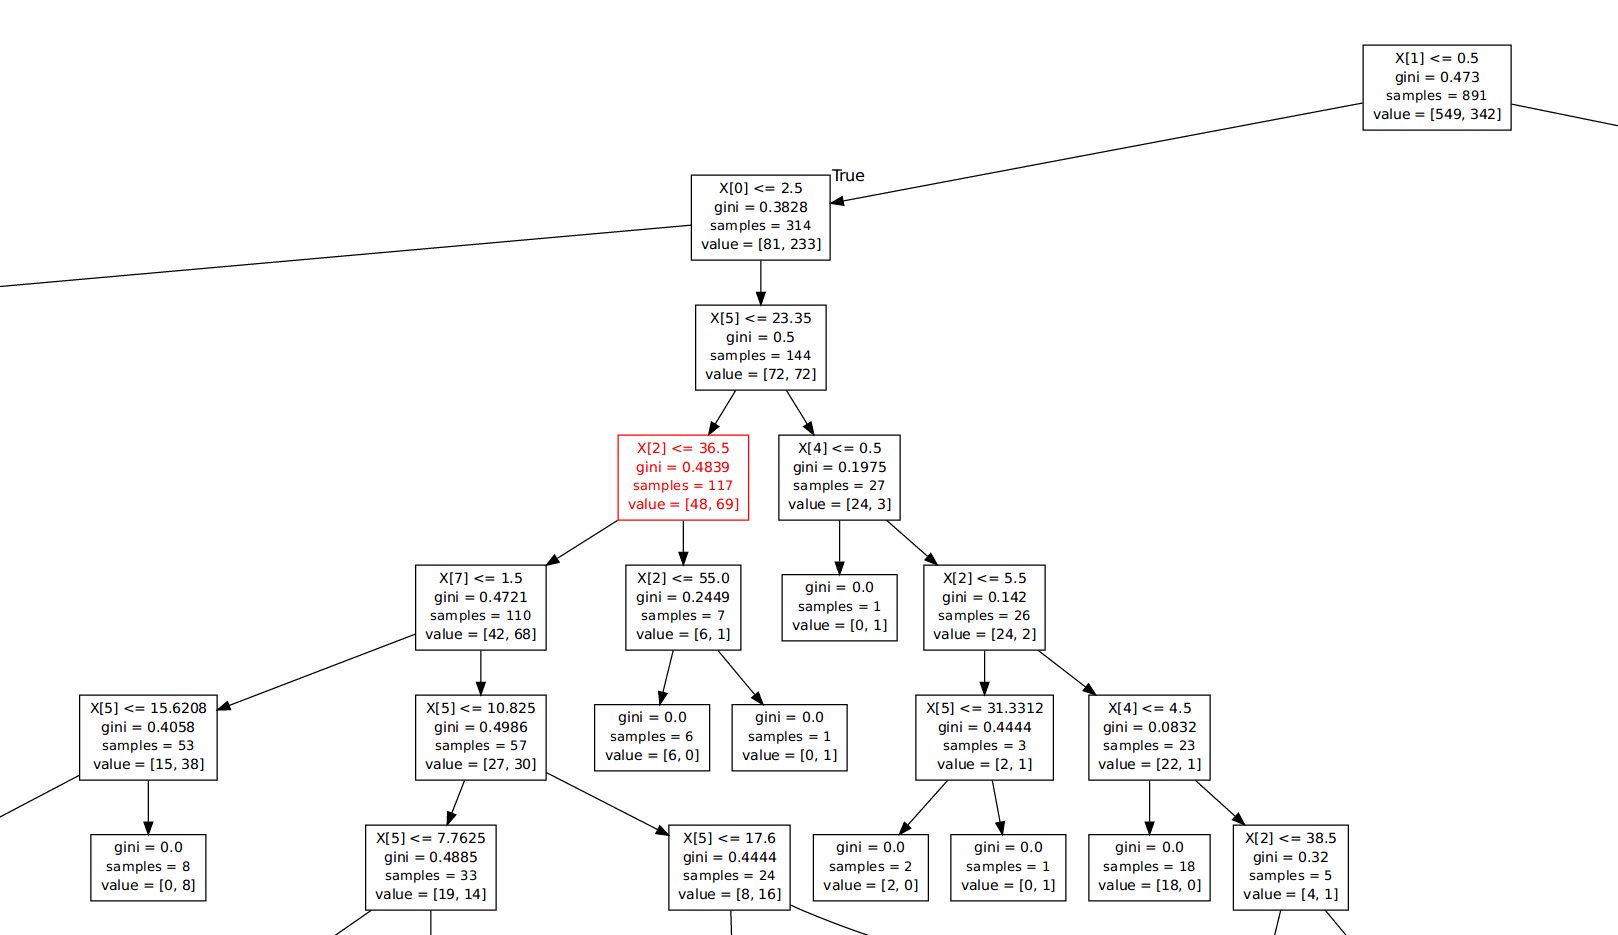

In [45]:
Image("partofdesciontree.png")

## K-fold cross validation function. 

Very important in machine learning is to validate the models performance. Because depending on how the training set is chosen the models performance might vary greatly. The model might score well on the training set but will score badly on new data. This is called overfitting. Next we write a function to do k-fold cross validation and also generate a results matrix. 

In [56]:
from sklearn import cross_validation

# X the training dataset
# y the to be predicted class
# clf classifier
# in how many folds the the data should be split to be tested

def kfoldv(X, y, clf, folds=20):
    result_matrix = np.matrix('0 0; 0 0')
    performance = 0
    
    #KFold wil return a list of train_indexes(also a list) for the training data and a list of train_indexes(also a list) for the test data
    kf = cross_validation.KFold(n=len(train), n_folds=folds, shuffle=True)
    
    # Loop over every fold and compute the prediction accuracy for 
    for train_index, test_index in kf:
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf = clf.fit(X_train, y_train)
        
        #return a list of prediction for the test data, in this case it will be 20 or 21 values(0 or 1)
        y_pred = clf.predict(X_test)
        
        # fill up the false/true positives/negatives
        for i in range(0, len(y_pred)):
            # the rows tell us the predicted value and the columns the reality(for testing purposes print it out)
            result_matrix[y_pred[i],y_test[i]] += 1
            
            #print(y_pred[i])
            #print(y_test[i])
            #print(result_matrix)
        prediction = sum(y_pred == y_test)/len(y_pred)
        performance += prediction 
        
        #return average performance and average results
    return (performance/folds, result_matrix/folds)

sklearn offers some great tools and implementations of different machine learning methods.

In [63]:
from sklearn import tree
folds = 20
performance, result_matrix = kfoldv(X, y, tree.DecisionTreeClassifier(), folds)
print("The average performance for %d folds is %0.2f" % (folds, performance*100))

The average performance for 20 folds is 77.69


In [64]:
clf = tree.DecisionTreeClassifier()
scores = cross_validation.cross_val_score(clf, X, y, cv=20)
scores

array([ 0.67391304,  0.80434783,  0.73333333,  0.77777778,  0.73333333,
        0.73333333,  0.68888889,  0.82222222,  0.82222222,  0.75      ,
        0.86363636,  0.70454545,  0.75      ,  0.90909091,  0.75      ,
        0.77272727,  0.81818182,  0.84090909,  0.77272727,  0.86363636])

In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*1.96))

Accuracy: 0.78 (+/- 0.12)


<a id='conclusions'></a>

## Conclusions

Q: Who were the people on board?
A: A wide variety of people.

Q: Who survived?
A: Mostly woman and children and passengers travelling in highest class.

Q: Who did not survive and why?
A: Men and lower class passenger. Priority was given to woman and children.

Q: Is our assumption that more rich people survived correct or not?
A: Yes

Q: And ofcourse: can we predict who survived?
A: Yes with an accuracy of 0.78 (+/- 0.12)


The heatmap below tells us that 23 times on average it predicted that the passenger deceased while in reality he actually died. 4.8 times on average it predicted that the passenger died while he survived.

4.7 times on average predicted that the passenger survived while they actually died and 12 times on average predicted correctly that the passenger survived.

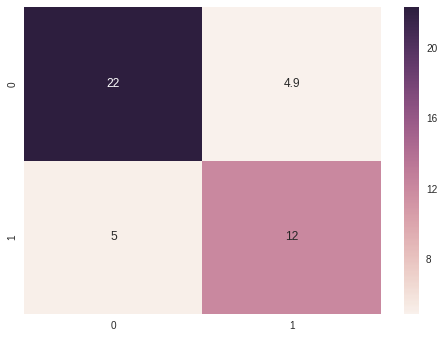

In [66]:
sns.heatmap(result_matrix,annot=True)

<a id='sources'></a>

## Sources
<a id='missing'>ref1</a> http://www.stat.columbia.edu/~gelman/arm/missing.pdf  
<a id='dctclass'>ref2</a> https://www-users.cs.umn.edu/~kumar/dmbook/ch4.pdf